In [ ]:
#download from kaggle directly
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download tawsifurrahman/covid19-radiography-database
! unzip covid19-radiography-database

In [32]:
import cv2
import glob
import keras
import random
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import os
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import color
from keras.callbacks import EarlyStopping
from seaborn import heatmap

In [2]:
scale_percent = 70 # percent of original size
width = int(290 * scale_percent / 100)
height = int(290 * scale_percent / 100)
dim = (width, height)

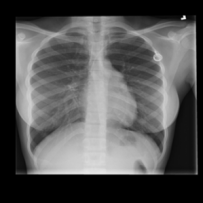

(203, 203)

In [3]:
img = cv2.imread(os.path.join('/content/COVID-19_Radiography_Dataset/Normal/images', 'Normal-1.png'),0)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)
resized.shape

In [4]:
images = []
Labels = []
for filename in os.listdir('/content/COVID-19_Radiography_Dataset/Normal/images'):
    img = cv2.imread(os.path.join('/content/COVID-19_Radiography_Dataset/Normal/images', filename),0)
    if img is not None:
        Labels.append(0)
        images.append(cv2.resize(img, dim, interpolation = cv2.INTER_AREA))

In [5]:
for filename in os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images'):
    img = cv2.imread(os.path.join('/content/COVID-19_Radiography_Dataset/COVID/images', filename),0)
    if img is not None:
        Labels.append(1)
        images.append(cv2.resize(img, dim, interpolation = cv2.INTER_AREA))

In [6]:
len(images)

13808

In [6]:
temp = list(zip(images, Labels))
random.shuffle(temp)
arimages, arLabels = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
arimages = np.array(arimages[:10000])
arLabels = np.array(arLabels[:10000])

In [7]:
arimages = arimages.reshape( (-1,41209) )
arimages = arimages/255


In [8]:
x_train, x_test,y_train, y_test  = train_test_split(arimages,arLabels, test_size= 0.05)

In [9]:
e = EarlyStopping(
    monitor="val_recall",
    min_delta=0.1,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [10]:
model = Sequential()
model.add( Dense(1,input_shape=(41209,),activation='sigmoid') )
model.compile(optimizer='sgd',loss= 'binary_crossentropy',metrics=['accuracy',keras.metrics.Recall()])

In [11]:
results=model.fit(
  x=arimages,
  y=arLabels,
  epochs=50,
  shuffle='true',
  validation_data=(x_test,y_test),
  callbacks=[e]
    )

Epoch 1/50
309/313 [============================>.] - ETA: 0s - loss: 6.3994 - accuracy: 0.6817 - recall: 0.3868

313/313 [==============================] - 7s 11ms/step - loss: 6.3870 - accuracy: 0.6825 - recall: 0.3861 - val_loss: 2.9868 - val_accuracy: 0.6580 - val_recall: 0.8889
Epoch 2/50
311/313 [============================>.] - ETA: 0s - loss: 4.8490 - accuracy: 0.7164 - recall: 0.4527

313/313 [==============================] - 2s 6ms/step - loss: 4.8393 - accuracy: 0.7169 - recall: 0.4526 - val_loss: 7.7582 - val_accuracy: 0.7480 - val_recall: 0.0000e+00
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.7180 - accuracy: 0.7189 - recall: 0.4548

313/313 [==============================] - 2s 5ms/step - loss: 4.7170 - accuracy: 0.7190 - recall: 0.4549 - val_loss: 1.2646 - val_accuracy: 0.7800 - val_recall: 0.7540
Epoch 4/50
311/313 [============================>.] - ETA: 0s - loss: 4.4332 - accuracy: 0.7297 - recall: 0.4747

313/313 [==============================] - 2s 6ms/step - loss: 4.4259 - accuracy: 0.7293 - recall: 0.4743 - val_loss: 6.4219 - val_accuracy: 0.7520 - val_recall: 0.0159
Epoch 5/50
311/313 [============================>.] - ETA: 0s - loss: 4.0745 - accuracy: 0.7361 - recall: 0.4893

313/313 [==============================] - 2s 6ms/step - loss: 4.1078 - accuracy: 0.7349 - recall: 0.4878 - val_loss: 16.6387 - val_accuracy: 0.7480 - val_recall: 0.0000e+00
Epoch 6/50
310/313 [============================>.] - ETA: 0s - loss: 4.1517 - accuracy: 0.7347 - recall: 0.4828

313/313 [==============================] - 2s 6ms/step - loss: 4.1807 - accuracy: 0.7338 - recall: 0.4824 - val_loss: 1.1699 - val_accuracy: 0.7960 - val_recall: 0.7540
Epoch 7/50
312/313 [============================>.] - ETA: 0s - loss: 3.9185 - accuracy: 0.7432 - recall: 0.5035

313/313 [==============================] - 2s 5ms/step - loss: 3.9402 - accuracy: 0.7431 - recall: 0.5025 - val_loss: 2.5394 - val_accuracy: 0.7860 - val_recall: 0.1667
Epoch 8/50
307/313 [============================>.] - ETA: 0s - loss: 3.7520 - accuracy: 0.7455 - recall: 0.5063

313/313 [==============================] - 2s 6ms/step - loss: 3.7707 - accuracy: 0.7445 - recall: 0.5033 - val_loss: 3.0178 - val_accuracy: 0.6920 - val_recall: 0.9683
Epoch 9/50
309/313 [============================>.] - ETA: 0s - loss: 3.4337 - accuracy: 0.7625 - recall: 0.5425

313/313 [==============================] - 2s 6ms/step - loss: 3.4116 - accuracy: 0.7630 - recall: 0.5439 - val_loss: 0.9567 - val_accuracy: 0.8700 - val_recall: 0.6190
Epoch 10/50
312/313 [============================>.] - ETA: 0s - loss: 3.4070 - accuracy: 0.7580 - recall: 0.5283

313/313 [==============================] - 2s 6ms/step - loss: 3.4038 - accuracy: 0.7581 - recall: 0.5292 - val_loss: 1.7569 - val_accuracy: 0.8200 - val_recall: 0.3254
Epoch 11/50
306/313 [============================>.] - ETA: 0s - loss: 3.8300 - accuracy: 0.7427 - recall: 0.5016

313/313 [==============================] - 2s 6ms/step - loss: 3.7799 - accuracy: 0.7449 - recall: 0.5052 - val_loss: 0.9810 - val_accuracy: 0.8640 - val_recall: 0.5952
Epoch 12/50
313/313 [==============================] - ETA: 0s - loss: 3.4288 - accuracy: 0.7636 - recall: 0.5431

313/313 [==============================] - 2s 5ms/step - loss: 3.4288 - accuracy: 0.7636 - recall: 0.5431 - val_loss: 3.9414 - val_accuracy: 0.7640 - val_recall: 0.0714
Epoch 13/50
306/313 [============================>.] - ETA: 0s - loss: 3.4608 - accuracy: 0.7567 - recall: 0.5296

313/313 [==============================] - 2s 6ms/step - loss: 3.4601 - accuracy: 0.7565 - recall: 0.5292 - val_loss: 0.9284 - val_accuracy: 0.8380 - val_recall: 0.7619
Epoch 14/50
311/313 [============================>.] - ETA: 0s - loss: 3.2791 - accuracy: 0.7676 - recall: 0.5496

313/313 [==============================] - 2s 5ms/step - loss: 3.2793 - accuracy: 0.7676 - recall: 0.5497 - val_loss: 4.3123 - val_accuracy: 0.7620 - val_recall: 0.0556
Epoch 15/50
312/313 [============================>.] - ETA: 0s - loss: 3.4352 - accuracy: 0.7606 - recall: 0.5370

313/313 [==============================] - 2s 6ms/step - loss: 3.4354 - accuracy: 0.7607 - recall: 0.5381 - val_loss: 2.2371 - val_accuracy: 0.7980 - val_recall: 0.2143
Epoch 16/50
310/313 [============================>.] - ETA: 0s - loss: 3.5202 - accuracy: 0.7592 - recall: 0.5300

313/313 [==============================] - 2s 6ms/step - loss: 3.5202 - accuracy: 0.7586 - recall: 0.5292 - val_loss: 4.8942 - val_accuracy: 0.7600 - val_recall: 0.0476
Epoch 17/50
309/313 [============================>.] - ETA: 0s - loss: 3.2106 - accuracy: 0.7726 - recall: 0.5553

313/313 [==============================] - 2s 6ms/step - loss: 3.1984 - accuracy: 0.7727 - recall: 0.5555 - val_loss: 1.1027 - val_accuracy: 0.8240 - val_recall: 0.8571
Epoch 18/50
311/313 [============================>.] - ETA: 0s - loss: 2.8736 - accuracy: 0.7758 - recall: 0.5644

313/313 [==============================] - 2s 6ms/step - loss: 2.8766 - accuracy: 0.7754 - recall: 0.5652 - val_loss: 12.2291 - val_accuracy: 0.3420 - val_recall: 1.0000
Epoch 19/50
311/313 [============================>.] - ETA: 0s - loss: 3.6900 - accuracy: 0.7551 - recall: 0.5269

313/313 [==============================] - 2s 5ms/step - loss: 3.6915 - accuracy: 0.7551 - recall: 0.5269 - val_loss: 2.0021 - val_accuracy: 0.8220 - val_recall: 0.3095
Epoch 20/50
307/313 [============================>.] - ETA: 0s - loss: 3.0673 - accuracy: 0.7752 - recall: 0.5644

313/313 [==============================] - 2s 6ms/step - loss: 3.0446 - accuracy: 0.7761 - recall: 0.5663 - val_loss: 1.5346 - val_accuracy: 0.7800 - val_recall: 0.8968
Epoch 21/50
308/313 [============================>.] - ETA: 0s - loss: 3.2576 - accuracy: 0.7605 - recall: 0.5408

313/313 [==============================] - 2s 6ms/step - loss: 3.2425 - accuracy: 0.7610 - recall: 0.5408 - val_loss: 0.9558 - val_accuracy: 0.8420 - val_recall: 0.7540
Epoch 22/50
305/313 [============================>.] - ETA: 0s - loss: 3.1980 - accuracy: 0.7685 - recall: 0.5542

313/313 [==============================] - 2s 6ms/step - loss: 3.2095 - accuracy: 0.7682 - recall: 0.5524 - val_loss: 4.8471 - val_accuracy: 0.7620 - val_recall: 0.0556
Epoch 23/50
311/313 [============================>.] - ETA: 0s - loss: 2.8692 - accuracy: 0.7793 - recall: 0.5711

313/313 [==============================] - 2s 6ms/step - loss: 2.8651 - accuracy: 0.7793 - recall: 0.5710 - val_loss: 5.4014 - val_accuracy: 0.5660 - val_recall: 0.9921
Epoch 24/50
309/313 [============================>.] - ETA: 0s - loss: 2.9375 - accuracy: 0.7779 - recall: 0.5733

313/313 [==============================] - 2s 5ms/step - loss: 2.9202 - accuracy: 0.7785 - recall: 0.5733 - val_loss: 1.4962 - val_accuracy: 0.7900 - val_recall: 0.9127
Epoch 25/50
308/313 [============================>.] - ETA: 0s - loss: 3.2556 - accuracy: 0.7663 - recall: 0.5526

313/313 [==============================] - 2s 6ms/step - loss: 3.2238 - accuracy: 0.7677 - recall: 0.5528 - val_loss: 7.1813 - val_accuracy: 0.4860 - val_recall: 0.9921
Epoch 26/50
313/313 [==============================] - ETA: 0s - loss: 2.8445 - accuracy: 0.7818 - recall: 0.5779

313/313 [==============================] - 2s 5ms/step - loss: 2.8445 - accuracy: 0.7818 - recall: 0.5779 - val_loss: 4.5508 - val_accuracy: 0.6060 - val_recall: 0.9921
Epoch 27/50
309/313 [============================>.] - ETA: 0s - loss: 3.1089 - accuracy: 0.7715 - recall: 0.5612

313/313 [==============================] - 2s 5ms/step - loss: 3.0953 - accuracy: 0.7722 - recall: 0.5609 - val_loss: 1.8706 - val_accuracy: 0.8260 - val_recall: 0.3254
Epoch 28/50
307/313 [============================>.] - ETA: 0s - loss: 3.1020 - accuracy: 0.7751 - recall: 0.5627

313/313 [==============================] - 2s 6ms/step - loss: 3.1146 - accuracy: 0.7742 - recall: 0.5625 - val_loss: 8.1741 - val_accuracy: 0.7520 - val_recall: 0.0159
Epoch 29/50
307/313 [============================>.] - ETA: 0s - loss: 2.8688 - accuracy: 0.7783 - recall: 0.5690

313/313 [==============================] - 2s 6ms/step - loss: 2.8897 - accuracy: 0.7770 - recall: 0.5663 - val_loss: 8.9704 - val_accuracy: 0.4560 - val_recall: 1.0000
Epoch 30/50
313/313 [==============================] - ETA: 0s - loss: 2.9194 - accuracy: 0.7785 - recall: 0.5721

313/313 [==============================] - 2s 5ms/step - loss: 2.9194 - accuracy: 0.7785 - recall: 0.5721 - val_loss: 6.8034 - val_accuracy: 0.7520 - val_recall: 0.0159
Epoch 31/50
313/313 [==============================] - ETA: 0s - loss: 2.7297 - accuracy: 0.7842 - recall: 0.5799

313/313 [==============================] - 2s 5ms/step - loss: 2.7297 - accuracy: 0.7842 - recall: 0.5799 - val_loss: 0.8599 - val_accuracy: 0.8800 - val_recall: 0.7143
Epoch 32/50
312/313 [============================>.] - ETA: 0s - loss: 2.9507 - accuracy: 0.7804 - recall: 0.5775

313/313 [==============================] - 2s 6ms/step - loss: 2.9623 - accuracy: 0.7803 - recall: 0.5764 - val_loss: 1.0368 - val_accuracy: 0.8780 - val_recall: 0.6111
Epoch 33/50
308/313 [============================>.] - ETA: 0s - loss: 2.7026 - accuracy: 0.7900 - recall: 0.5954

313/313 [==============================] - 2s 6ms/step - loss: 2.6990 - accuracy: 0.7906 - recall: 0.5961 - val_loss: 0.8027 - val_accuracy: 0.8680 - val_recall: 0.7381
Epoch 34/50
309/313 [============================>.] - ETA: 0s - loss: 2.6913 - accuracy: 0.7911 - recall: 0.5899

313/313 [==============================] - 2s 6ms/step - loss: 2.6873 - accuracy: 0.7905 - recall: 0.5903 - val_loss: 10.7853 - val_accuracy: 0.7480 - val_recall: 0.0000e+00
Epoch 35/50
306/313 [============================>.] - ETA: 0s - loss: 3.0808 - accuracy: 0.7752 - recall: 0.5631

313/313 [==============================] - 2s 6ms/step - loss: 3.1225 - accuracy: 0.7741 - recall: 0.5613 - val_loss: 1.1219 - val_accuracy: 0.8800 - val_recall: 0.5952
Epoch 36/50
308/313 [============================>.] - ETA: 0s - loss: 2.6456 - accuracy: 0.7926 - recall: 0.5993

313/313 [==============================] - 2s 6ms/step - loss: 2.6483 - accuracy: 0.7923 - recall: 0.6000 - val_loss: 0.8364 - val_accuracy: 0.8820 - val_recall: 0.7302
Epoch 37/50
304/313 [============================>.] - ETA: 0s - loss: 2.8600 - accuracy: 0.7847 - recall: 0.5812

313/313 [==============================] - 2s 5ms/step - loss: 2.8370 - accuracy: 0.7853 - recall: 0.5834 - val_loss: 0.8993 - val_accuracy: 0.8920 - val_recall: 0.6825
Epoch 38/50
305/313 [============================>.] - ETA: 0s - loss: 2.8563 - accuracy: 0.7808 - recall: 0.5719

313/313 [==============================] - 2s 5ms/step - loss: 2.8736 - accuracy: 0.7803 - recall: 0.5737 - val_loss: 1.5783 - val_accuracy: 0.7860 - val_recall: 0.9048
Epoch 39/50
312/313 [============================>.] - ETA: 0s - loss: 2.7242 - accuracy: 0.7831 - recall: 0.5823

313/313 [==============================] - 2s 5ms/step - loss: 2.7212 - accuracy: 0.7832 - recall: 0.5818 - val_loss: 1.3338 - val_accuracy: 0.8240 - val_recall: 0.8889
Epoch 40/50
310/313 [============================>.] - ETA: 0s - loss: 2.9674 - accuracy: 0.7789 - recall: 0.5739

313/313 [==============================] - 2s 6ms/step - loss: 3.0199 - accuracy: 0.7786 - recall: 0.5702 - val_loss: 2.3462 - val_accuracy: 0.8080 - val_recall: 0.2540
Epoch 41/50
310/313 [============================>.] - ETA: 0s - loss: 2.6591 - accuracy: 0.7918 - recall: 0.6004

313/313 [==============================] - 2s 6ms/step - loss: 2.6663 - accuracy: 0.7919 - recall: 0.5988 - val_loss: 0.8100 - val_accuracy: 0.8780 - val_recall: 0.7778
Epoch 42/50
307/313 [============================>.] - ETA: 0s - loss: 2.3870 - accuracy: 0.8001 - recall: 0.6129

313/313 [==============================] - 2s 6ms/step - loss: 2.4056 - accuracy: 0.7991 - recall: 0.6097 - val_loss: 5.9685 - val_accuracy: 0.5220 - val_recall: 0.9921
Epoch 43/50
304/313 [============================>.] - ETA: 0s - loss: 2.8698 - accuracy: 0.7786 - recall: 0.5733

313/313 [==============================] - 2s 6ms/step - loss: 2.8416 - accuracy: 0.7799 - recall: 0.5756 - val_loss: 5.6820 - val_accuracy: 0.7580 - val_recall: 0.0397
Epoch 44/50
311/313 [============================>.] - ETA: 0s - loss: 2.4357 - accuracy: 0.8010 - recall: 0.6136

313/313 [==============================] - 2s 6ms/step - loss: 2.4316 - accuracy: 0.8013 - recall: 0.6139 - val_loss: 1.9393 - val_accuracy: 0.8180 - val_recall: 0.2937
Epoch 45/50
311/313 [============================>.] - ETA: 0s - loss: 2.7074 - accuracy: 0.7888 - recall: 0.5914

313/313 [==============================] - 2s 5ms/step - loss: 2.6988 - accuracy: 0.7891 - recall: 0.5903 - val_loss: 0.9646 - val_accuracy: 0.8480 - val_recall: 0.8492
Epoch 46/50
310/313 [============================>.] - ETA: 0s - loss: 2.4377 - accuracy: 0.8039 - recall: 0.6215

313/313 [==============================] - 2s 6ms/step - loss: 2.4312 - accuracy: 0.8041 - recall: 0.6221 - val_loss: 1.2591 - val_accuracy: 0.8200 - val_recall: 0.9127
Epoch 47/50
311/313 [============================>.] - ETA: 0s - loss: 2.7245 - accuracy: 0.7900 - recall: 0.5911

313/313 [==============================] - 2s 6ms/step - loss: 2.7150 - accuracy: 0.7904 - recall: 0.5926 - val_loss: 1.1455 - val_accuracy: 0.8740 - val_recall: 0.5476
Epoch 48/50
311/313 [============================>.] - ETA: 0s - loss: 2.5968 - accuracy: 0.7946 - recall: 0.6017

313/313 [==============================] - 2s 6ms/step - loss: 2.6161 - accuracy: 0.7939 - recall: 0.6000 - val_loss: 4.7252 - val_accuracy: 0.7660 - val_recall: 0.0714
Epoch 49/50
307/313 [============================>.] - ETA: 0s - loss: 2.5089 - accuracy: 0.8001 - recall: 0.6085

313/313 [==============================] - 2s 6ms/step - loss: 2.5104 - accuracy: 0.7991 - recall: 0.6070 - val_loss: 0.9395 - val_accuracy: 0.8460 - val_recall: 0.8492
Epoch 50/50
303/313 [============================>.] - ETA: 0s - loss: 2.4183 - accuracy: 0.7968 - recall: 0.6057

313/313 [==============================] - 2s 6ms/step - loss: 2.4196 - accuracy: 0.7968 - recall: 0.6081 - val_loss: 1.5275 - val_accuracy: 0.8380 - val_recall: 0.3810


In [12]:
pred = model.predict(x_test)

In [19]:
pred = (pred>=0.5).astype(int)


In [22]:
accuracy_score(y_test,pred)

0.838

In [34]:
cf = confusion_matrix(y_test,pred)

<function matplotlib.pyplot.show(*args, **kw)>

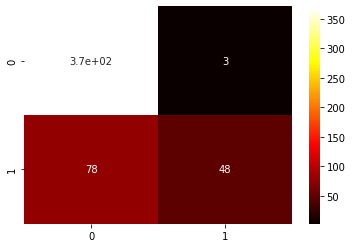

In [42]:
heatmap(cf,annot=True,cmap='hot')
plt.show